In [1]:
import sys
sys.path.append('../')
from graph_max_shift import *
import matplotlib.pyplot as plt
import pickle

In [2]:
# for plotting
from matplotlib.colors import ListedColormap
colors = ["tab:gray",  "#ED5564", "#4FC1E8", "#FFCE54", "#A0D568", "#AC92EB", "tab:pink",
         '#f8bbc1', '#b9e6f6', '#ffebbb', '#d9eec3', '#ded3f7', '#f4c9e7'
         ]
cmap = ListedColormap(colors)

plt.rc('font',  size = 14)

In the first set of plots we fix the dataset and vary the connectivity radius in the random geometric graph. 

We use a modified version of the bimodal dataset (with smaller separation between the components and non equal weights, to increase the difficulity of the clustering task).

In [3]:
n = 10000
weights = [1/4, 3/4]
means = [np.array([.8,-.8]), np.array([-.8,.8])]
covs = [np.array([[(2/3)**2,(7/10)*(2/3)**2], [(7/10)*(2/3)**2, (2/3)**2]]), np.array([[(2/3)**2,0], [0, (2/3)**2]])]

bimodal = GaussianMixture(weights, means, covs)
modes, saddle, boundaries = ground_truth_clustering(bimodal)

In [4]:
# data = bimodal.sample(n)

with open('data/bimodal_hyperparameter.pkl', 'rb') as file:
    data, boundaries = pickle.load(file)
graph = GeometricGraph(data, 1, batch_size=10000)
maxshift = GraphMaxShift(graph)

100%|██████████| 2/2 [00:02<00:00,  1.30s/it]


In [22]:
# with open('data/bimodal_hyperparameter.pkl', 'wb') as file: # save raw data, clusters, parameters used, and ground truth 
#     pickle.dump((data, boundaries), file)

In [5]:
theta = np.arange(0,2*np.pi, .01)

100%|██████████| 10000/10000 [00:00<00:00, 10202.11it/s]
C:\Users\codae\Documents\GraphMaxShift\figures\..\graph_max_shift\main.py:179: RuntimeWarning: Couldn't reach some vertices at src/paths/unweighted.c:444
  graph_distance = len(self.graph.G.get_shortest_path(i,j)) -1
100%|██████████| 10000/10000 [00:03<00:00, 3150.42it/s]


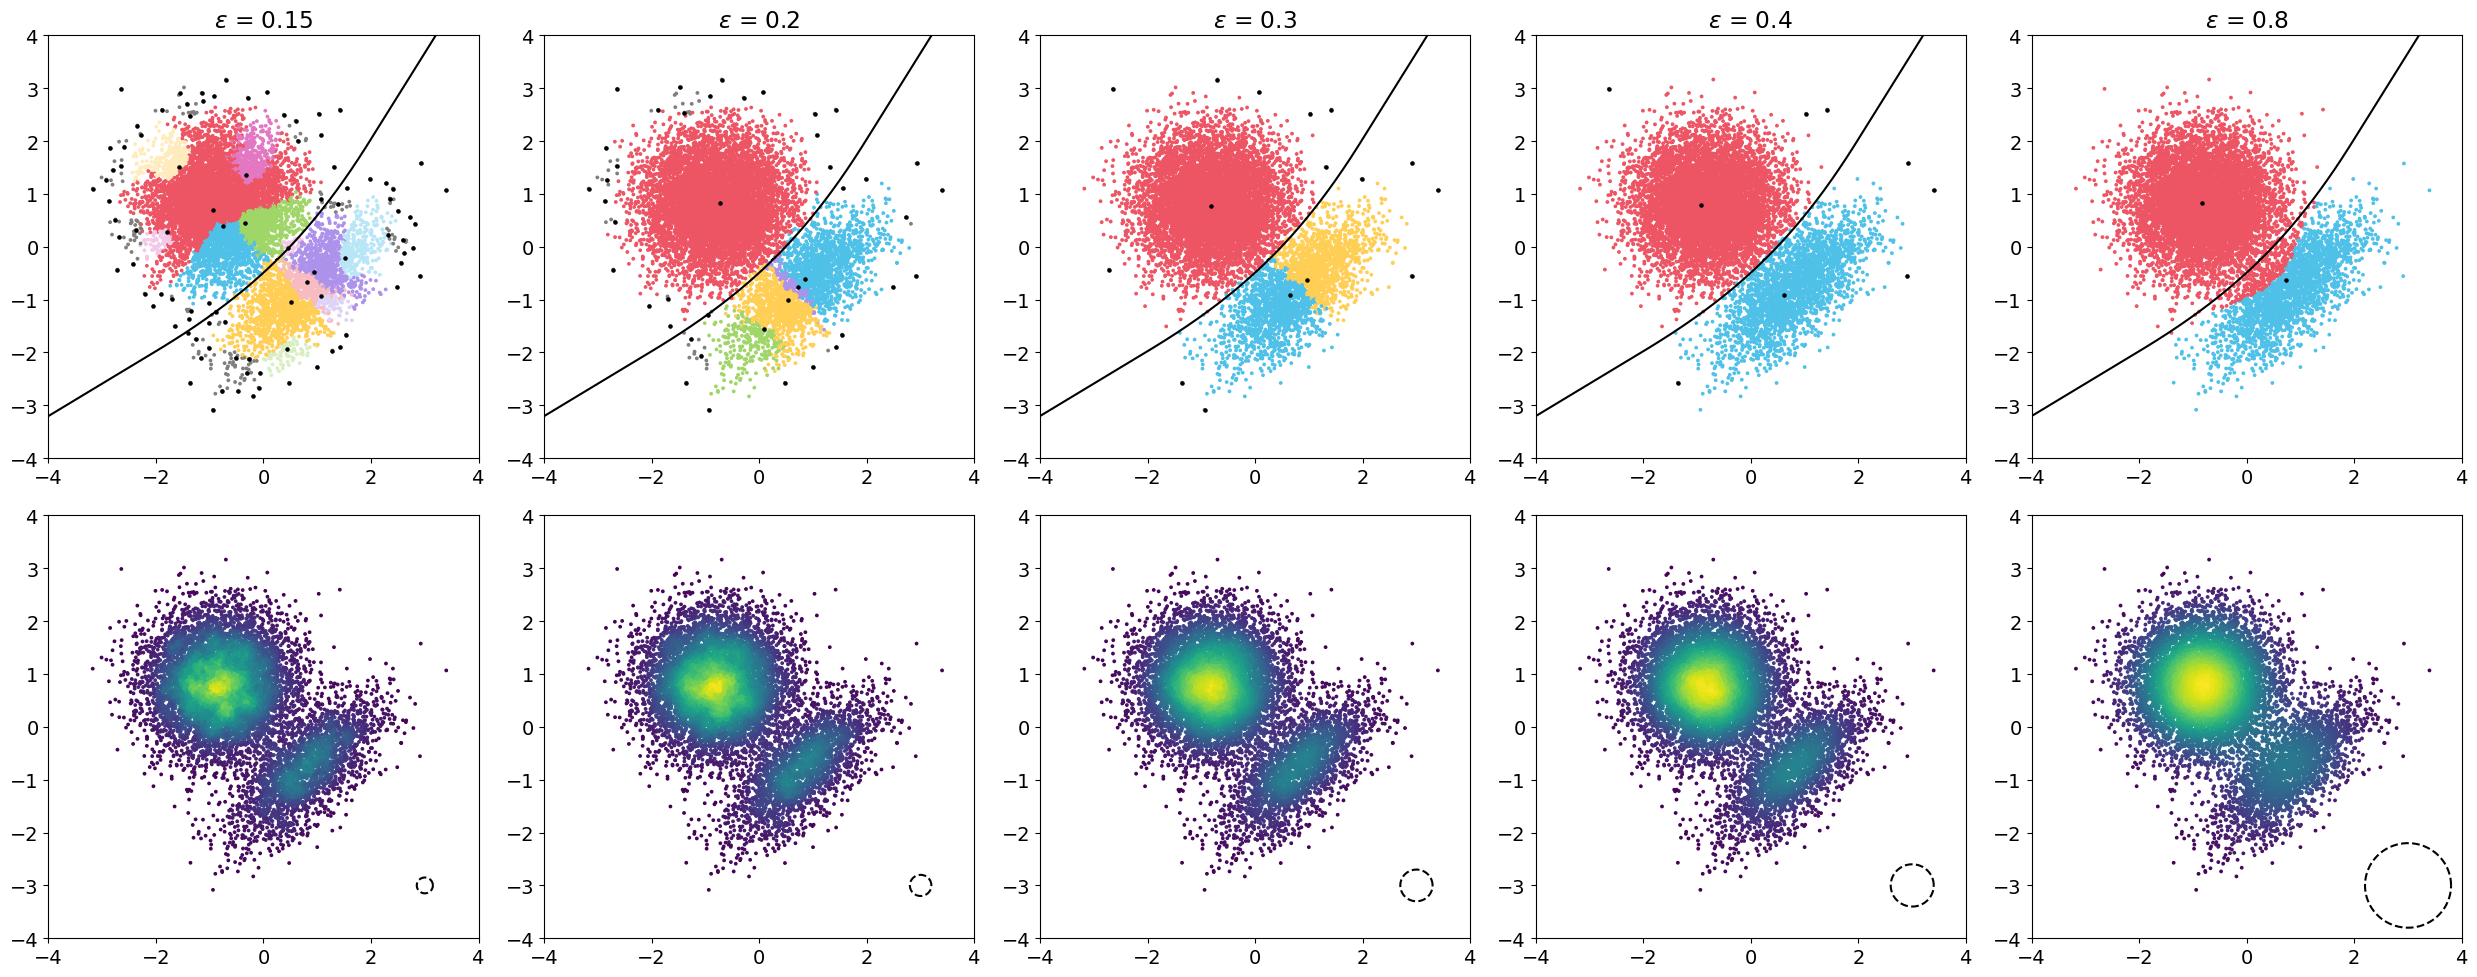

In [6]:
theta = np.arange(0,2*np.pi, .01)

fig, axs = plt.subplots(2,5,figsize = [25,10])
for i,r in enumerate([.15,.2,.3,.4,.8]):
    maxshift.cluster(r, m = 1)
    clusters = maxshift.reindex_clusters(25)
    axs[0,i].scatter(data[:,0], data[:,1], c = clusters, cmap = cmap, s = 3, vmin =0, vmax = 13)
    axs[0,i].set_title(r'$\epsilon$ = ' + str(r))
    axs[0,i].scatter(data[maxshift.modes,0], data[maxshift.modes,1], s =5, color = 'black')
    
    axs[1,i].scatter(data[:,0], data[:,1],  c = maxshift.graph.deg, s = 3, cmap = 'viridis')
    axs[1,i].plot(3+r*np.cos(theta), -3+ r*np.sin(theta), color = 'black', linestyle = 'dashed')
    
for i in range(5):
    for path in boundaries :
        axs[0,i].plot(path[:,0], path[:,1], color = 'black')
    axs[1,i].set_xlim(-4,4)
    axs[1,i].set_ylim(-4,4)
    axs[0,i].set_xlim(-4,4)
    axs[0,i].set_ylim(-4,4)
    
plt.tight_layout()
plt.savefig('plots/hyperparameter_tuning_with_deg.png', format='png', dpi=300, bbox_inches='tight')